In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

[-2.0, -2.3, -1.7, -1.3, -0.7, -1.0, 0.0, -0.3, 0.7, 0.3, 1.3, 1.0, 2.0, 1.7, 2.7, 2.3, 3.7, 3.3, 3.0, 4.0, -4.0, -3.7, -3.3, -3.0, -2.7]
[19.03002047 19.03659487 19.20529928 19.55235765 19.76410379 19.76676667
 20.17702164 19.99108168 20.2465539  20.22019291 20.41243753 20.36201336
 20.59688038 20.42363094 20.62271945 20.61954745 20.6217693  20.62070399
 20.62225295 20.62408147 18.16456817 18.18687351 18.13666576 18.11298412
 18.7509817 ]


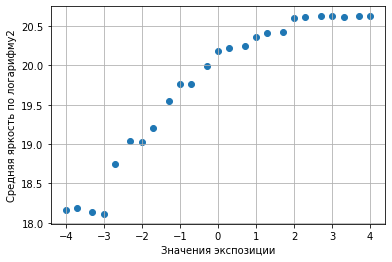

In [45]:
def avg_brightness(name, left_bound, right_bound, bottom_bound, top_bound):
  img = cv2.imread(name, cv2.IMREAD_GRAYSCALE) # Считываем изображение в черно-белом формате
  
  crop_img = img[bottom_bound:top_bound, left_bound:right_bound]

  crop_bright = 0
  for i in range(crop_img.shape[0]):
    for j in range(crop_img.shape[1]):
      crop_bright += crop_img[i, j]
  return crop_bright / crop_img.shape[0] * crop_img.shape[1]

ev = []
avg_bright = []
dir = '/content/drive/MyDrive/compvis/'
for filename in os.listdir(dir):
  ev_i = float(filename[: -len('.jpg')])
  ev.append(ev_i)
  avg_bright.append(avg_brightness(dir + filename, 1000, 1080, 600, 680))


print(ev)
print(np.log2(avg_bright))
plt.scatter(ev, np.log2(avg_bright))
plt.xlabel('Значения экспозиции')
plt.ylabel('Средняя яркость по логарифму2')
plt.grid()

Динамическая область:

По старому определнию (линейная область) - от 18.7509817 до  20.41243753 (средняя яркость); от -3 до 2 по EV.

По новому определению - от  18.11298412 до 20.62225295